## 📖 Introduction to Decision Trees

A **Decision Tree** is a machine learning model that makes predictions by splitting the data into smaller groups **based on feature values**.

🔹 **Classification Trees** → Predict **categorical outcomes** (e.g., spam vs. not spam).  
🔹 **Regression Trees** → Predict **continuous values** (e.g., house prices).  

### ✅ **Advantages of Decision Trees**
✔ Simple to interpret & visualize  
✔ No need for feature scaling  
✔ Works well with categorical and numerical data  

### ❌ **Limitations**
⚠ Prone to overfitting  
⚠ Can be sensitive to small changes in data  

---

## 🧮 Mathematics Behind Decision Trees

### 🔹 1. Splitting Criteria: Gini Impurity vs. Entropy

A Decision Tree decides **where to split** by measuring **impurity** in a node.

1️⃣ **Gini Impurity** (used in CART algorithm):

$$
Gini = 1 - \sum p_i^2
$$

- Measures how **mixed** a node is.
- **Lower Gini** = **Better split**.

2️⃣ **Entropy (Information Gain)**:

$$
Entropy = -\sum p_i \log_2 p_i
$$

- Measures **disorder** in the node.
- Information Gain = **How much entropy is reduced after a split**.

### 🔹 2. Stopping Criteria (Pruning)
A tree can **grow too deep**, causing **overfitting**.

**Ways to control tree depth**:
- **Max Depth**: Limits the number of splits.
- **Min Samples Split**: Minimum samples required to split a node.
- **Pruning**: Removing branches that **add little value**.

---


## 📦 Importing Libraries & Dataset

We will use the **Breast Cancer dataset**, a common classification dataset.


In [29]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [30]:
# Load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Target"] = data.target  # 0 = Malignant, 1 = Benign

# Display first five rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 🔍 Data Preprocessing

Before training, we:
✔ **Check for missing values**  
✔ **Normalize features** (for Random Forests, this is optional)  
✔ **Split data into training & testing sets**


In [31]:
# Check for missing values
print("🔍 Missing values per column:\n", df.isnull().sum())

# Separate features and target
X = df.drop(columns=["Target"])  
y = df["Target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Data prepared: Train = {X_train.shape}, Test = {X_test.shape}")

🔍 Missing values per column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64
✅ Data prepared: Train = (455, 30), Test = (114, 30)


## 🤖 Training a Decision Tree

Now, we train a **Decision Tree Classifier** and visualize the tree.


In [32]:
# Initialize and train the Decision Tree
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"📊 Decision Tree Accuracy: {accuracy_tree:.4f}")


📊 Decision Tree Accuracy: 0.9474


## 🌳 Visualizing the Decision Tree

We can visualize the tree structure using `plot_tree()`.

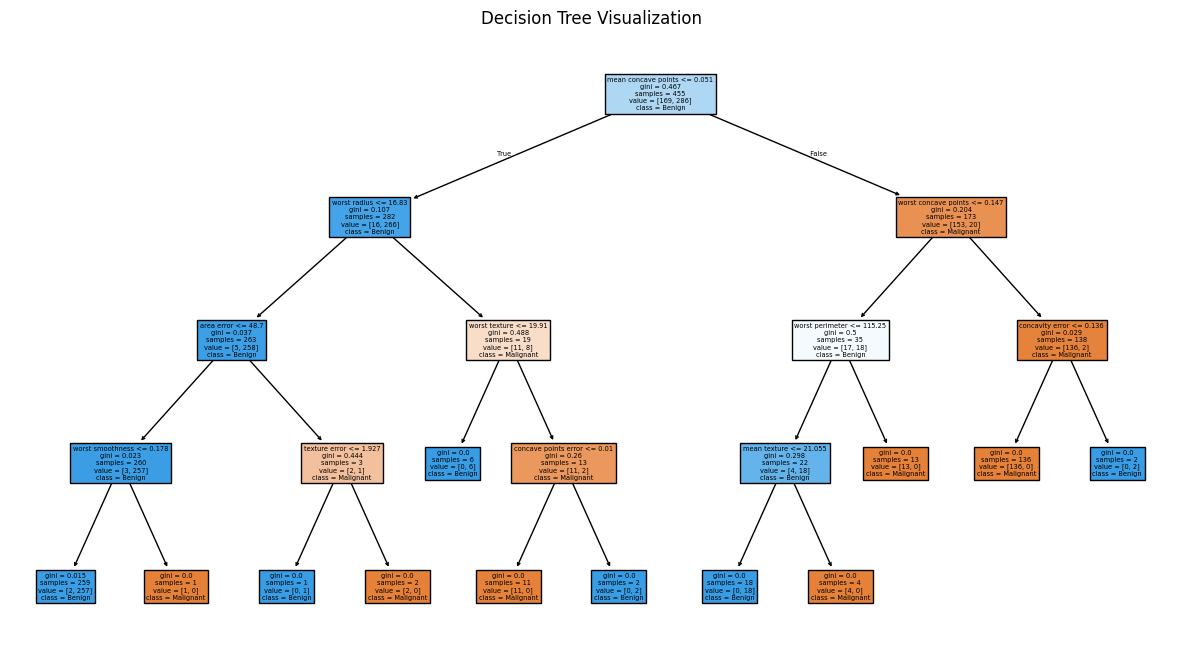

In [33]:
# Plot the Decision Tree
plt.figure(figsize=(15,8))
plot_tree(tree_model, feature_names=X.columns, class_names=["Malignant", "Benign"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


## 🌲 Random Forest: An Ensemble of Decision Trees

A **Random Forest** is a machine learning algorithm that **combines multiple Decision Trees** to make predictions more robust and generalizable.

### 🔹 How Does It Work?
1️⃣ **Bootstrap Sampling (Bagging)**  
   - Each tree is trained on a **random subset** of the data (with replacement).  
   - This reduces **variance** and makes the model more robust.

2️⃣ **Random Feature Selection**  
   - Instead of using **all features** at each split, only a **random subset of features** is considered.  
   - This reduces **correlation** between trees, preventing overfitting.

3️⃣ **Voting/Averaging for Final Prediction**  
   - **Classification:** The **majority vote** from all trees is the final prediction.  
   - **Regression:** The final prediction is the **average of all tree outputs**.

---

### 📖 Mathematical Formulation

#### 🔹 1. Bootstrapping (Bagging)
Each Decision Tree **$T_i$** is trained on a different **bootstrap sample** **$D_i$**:

$$
D_i = \{ (x_j, y_j) \} \quad \text{where} \quad j \sim U(1, n)
$$

where **$U(1, n)$** means each sample **is drawn randomly with replacement**.

The final prediction for **classification** is:

$$
\hat{y} = \text{mode} \{ T_1(x), T_2(x), ..., T_N(x) \}
$$

For **regression**, it is the **average** prediction:

$$
\hat{y} = \frac{1}{N} \sum_{i=1}^{N} T_i(x)
$$

where **$N$** is the total number of trees.

---

#### 🔹 2. Gini Importance for Feature Selection
The **importance of a feature $X_j$** is measured using **Gini Importance** across all splits in the forest:

$$
\text{Feature Importance}(X_j) = \sum_{t=1}^{T} w_t \cdot \Delta G_t(X_j)
$$

where:
- **$w_t$** = proportion of samples at node $t$  
- **$\Delta G_t(X_j)$** = reduction in Gini impurity due to $X_j$  

The higher the value, the more **important** the feature.

---

#### 🔹 3. Bias-Variance Tradeoff in Random Forests
Random Forest reduces **variance** while maintaining low **bias**:

$$
\text{Variance of Random Forest} = \frac{\text{Variance of a Single Tree}}{N}
$$

where **$N$** is the number of trees.  
- **More trees → Lower variance**  
- **Limiting depth → Prevents overfitting**  

---

### ✅ Summary:
✔ **Random Forest = Bagging + Feature Randomization + Multiple Decision Trees**  
✔ **More trees = More stability, but slower training**  
✔ **Feature importance can be extracted using Gini or Entropy**  

🚀 **Next: Let's implement Random Forest in Python!**


In [34]:
# Initialize and train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"📊 Random Forest Accuracy: {accuracy_rf:.4f}")


📊 Random Forest Accuracy: 0.9649


## 🔥 Feature Importance in Random Forest

Random Forests allow us to analyze **which features are most important** for predictions.


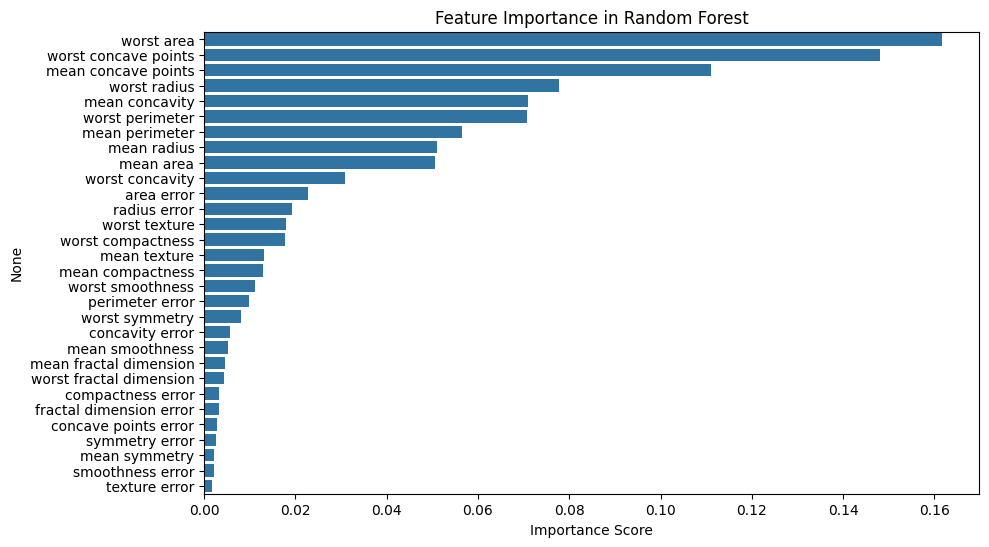

In [35]:
# Get feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.show()


## 🎯 Hyperparameter Tuning with GridSearchCV

Hyperparameters control how a model learns. **Finding the optimal values** for these hyperparameters can significantly improve model performance.

---

### 🔹 What is Grid Search?
**GridSearchCV** is an **exhaustive search** technique used to find the best hyperparameters for a model.

1️⃣ **Define a set of possible values** for each hyperparameter.  
2️⃣ **Train the model using every combination** of those values.  
3️⃣ **Evaluate each combination** using **cross-validation**.  
4️⃣ **Select the best set of parameters** based on performance.

🔍 **Mathematical Representation:**
Given a model **$f(x; \theta)$**, where **$\theta$** is the set of hyperparameters, **GridSearch** finds:

$$
\theta^* = \arg\min_{\theta \in H} \sum_{i=1}^{K} L(f(x_i; \theta), y_i)
$$

where:
- **$H$** is the predefined hyperparameter grid.
- **$L$** is the loss function (e.g., accuracy, MSE).
- **$K$** is the number of cross-validation folds.

---

### 🔹 Why Use GridSearchCV?
✔ **Systematic way** to find optimal hyperparameters.  
✔ **Uses Cross-Validation** to prevent overfitting.  
✔ **Can be parallelized** for efficiency.  

⚠ **Limitation:** **Computationally expensive** for large parameter grids.  
🚀 Alternative: **RandomizedSearchCV** (random sampling instead of exhaustive search).

---


In [36]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"✅ Best parameters: {grid_search.best_params_}")


✅ Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


## 💡 Interview Questions & Answers

1️⃣ **Gini vs. Entropy – When to use each?**  
   - **Gini Impurity** is computationally faster and is the default in `sklearn`.  
   - **Entropy (Information Gain)** is theoretically stronger but requires logarithm calculations.  
   - Both give similar results; Gini is preferred for efficiency.

---

2️⃣ **Why does Random Forest reduce overfitting?**  
   - Uses **multiple Decision Trees** trained on **random subsets of data**.  
   - Each tree sees **a different portion of the dataset**, reducing reliance on specific features.  
   - The final prediction is **an average (regression) or a majority vote (classification)**, smoothing out individual tree biases.

---

3️⃣ **How does increasing `max_depth` affect a tree?**  
   - **Increases complexity** → Model learns more patterns but risks **overfitting**.  
   - **Too deep** → Memorizes training data, loses generalization.  
   - **Too shallow** → Underfits, missing key patterns in data.

---

4️⃣ **What are the main hyperparameters in Random Forest?**  
   - `n_estimators` → Number of trees in the forest (higher = better stability).  
   - `max_depth` → Maximum depth of trees (controls overfitting).  
   - `min_samples_split` → Minimum samples needed to split a node.  
   - `min_samples_leaf` → Minimum samples required in a leaf node.  
   - `max_features` → Number of features considered per split (reduces correlation).

---

5️⃣ **How does feature importance work in Random Forest?**  
   - **Computed by measuring how much each feature reduces impurity** (Gini or Entropy) across all trees.  
   - Features that split nodes **early and frequently** are considered more important.  
   - Extracted using `.feature_importances_` in `sklearn`.

---
